<h1>Understanding CardioGood Fitness Customer Profiles for Market Research</h1>

The objective is to identity the profile of the typical customer of each treadmill product offered by CardioGood Fitness.

<h2>Data Analysis</h2>

<h3>1. Data Collection And Preparation</h3>

In [2]:
# Import package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import Data
df = pd.read_csv('./CardioGoodFitness.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [4]:
# Make a copy and clean data
cgf_df = df.copy()

# Check for duplicates
print(f'The number of duplicate is {cgf_df.duplicated().sum()}')

# Check for missing values
cgf_df.duplicated().sum()

The number of duplicate is 0


np.int64(0)

<h3>2. Analyse Data</h3>

<Axes: >

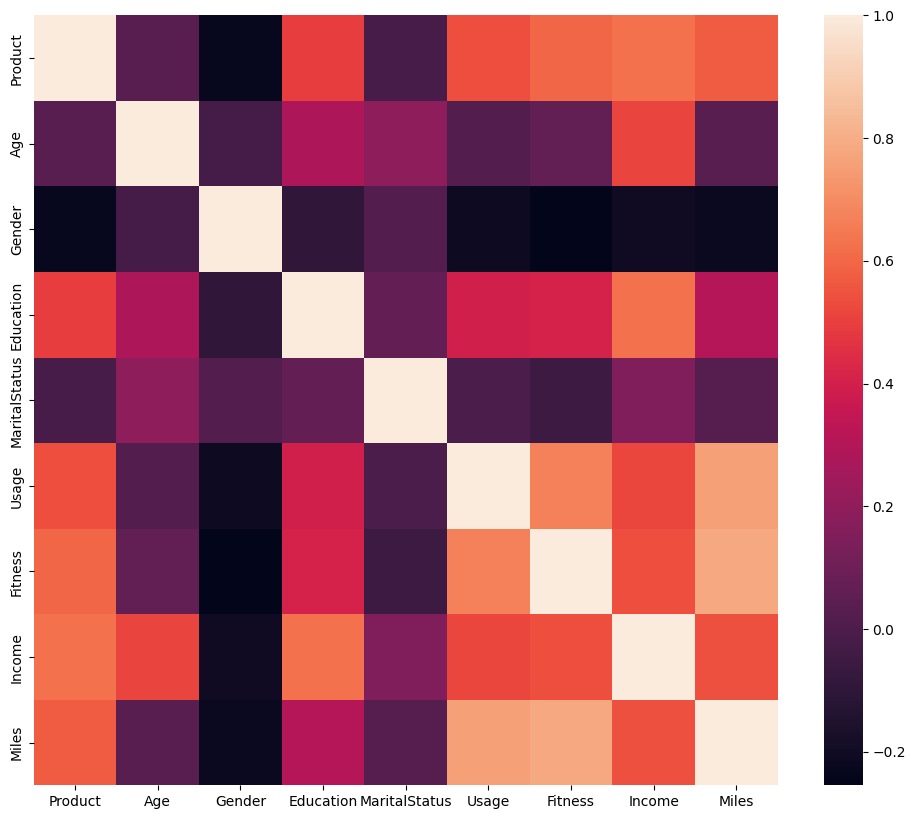

In [5]:
# Plot of heatmap to show pairwise correlation of all columns
product_copy = df.copy()

product = product_copy['Product'].value_counts()
product

def encode_product(x):
    if x == 'TM195':
        return 0
    elif x == 'TM498':
        return 1
    elif x == 'TM798':
        return 2
    
def encode_gender(x):
    if x == 'Male':
        return 0
    elif x == 'Female':
        return 1

def encode_marital(x):
    if x == 'Single':
        return 0
    elif x == 'Partnered':
        return 1

product_copy['Product'] = product_copy['Product'].apply(encode_product)
product_copy['Gender'] = product_copy['Gender'].apply(encode_gender)
product_copy['MaritalStatus'] = product_copy['MaritalStatus'].apply(encode_marital)
product_corr = product_copy.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(product_corr)

<h4>2.1 Product Gender Based Analysis</h4>

<Axes: ylabel='count'>

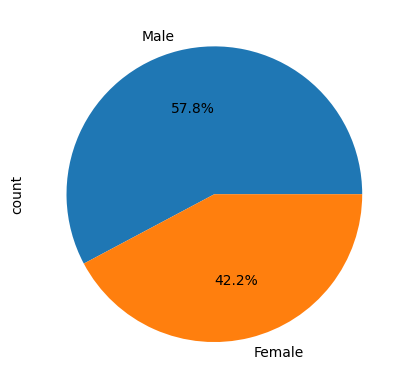

In [6]:
# Analyze gender distribution among customers
# Gender is categorical and pie chart used to percentage of each category.
gender_distribution = df['Gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%') 

<Axes: xlabel='Product'>

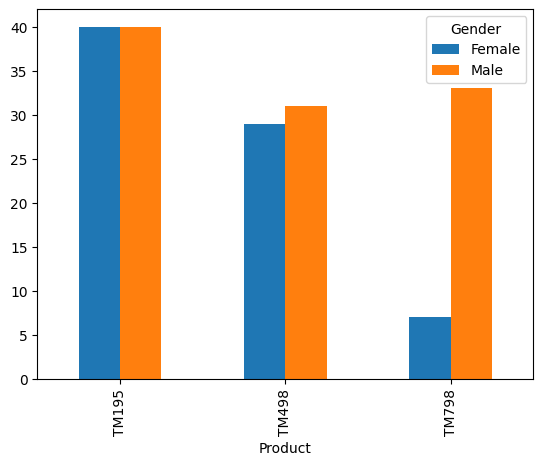

In [7]:
# Analyze gender distribution among customers for each specific product.
# Barchart used for categorical comparison of gender distribution across type of products.
product_gender_distribution = df.groupby(['Product', 'Gender']).size().unstack()
product_gender_distribution.plot(kind='bar')

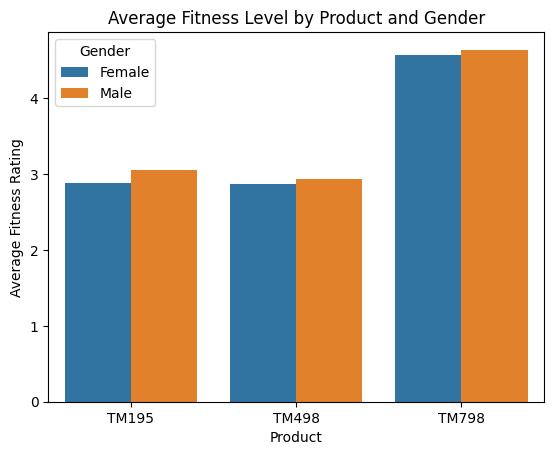

In [8]:
# Analyze the distribution of products across gender and fitness levels
# 
# pgf_distribution = df.groupby(['Product', 'Gender', 'Fitness']).size().unstack()
# pgf_distribution.plot(kind='bar')

fitness_avg = df.groupby(['Product', 'Gender'])['Fitness'].mean().reset_index()

sns.barplot(x='Product', y='Fitness', hue='Gender', data=fitness_avg)
plt.title("Average Fitness Level by Product and Gender")
plt.xlabel("Product")
plt.ylabel("Average Fitness Rating")
plt.legend(title="Gender")
plt.show()

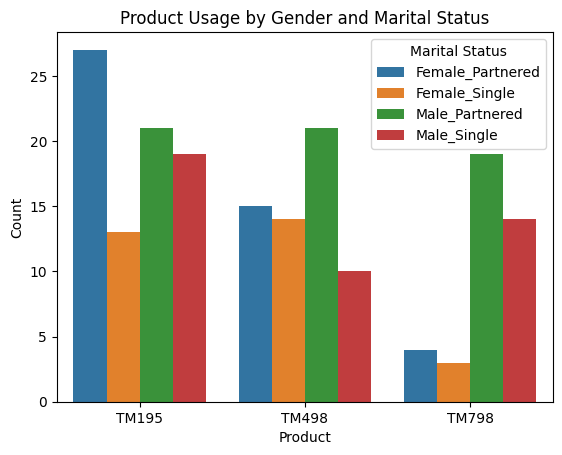

In [22]:
# Analyze the distribution of products across gender and fitness levels
df['Gender_MaritalStatus'] = df['Gender'] + '_' + df['MaritalStatus']
pgf_distribution = df.groupby(['Product', 'Gender_MaritalStatus']).size().reset_index(name='Count')
pgf_distribution

sns.barplot(x='Product', y='Count', hue='Gender_MaritalStatus', data=pgf_distribution)
plt.title('Product Usage by Gender and Marital Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

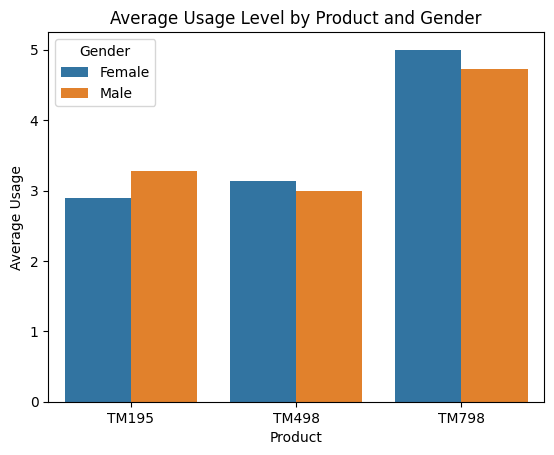

In [10]:
# Analyze the distribution of products across gender and usage levels
# pgu_distribution = df.groupby(['Product', 'Gender', 'Usage']).size().unstack()
# pgu_distribution.plot(kind='bar')

# Average usage by product and gender
pgu_avg = df.groupby(['Product', 'Gender'])['Usage'].mean().reset_index()

sns.barplot(x='Product', y='Usage', hue='Gender', data=pgu_avg)
plt.title("Average Usage Level by Product and Gender")
plt.xlabel("Product")
plt.ylabel("Average Usage")
plt.legend(title="Gender")
plt.show()

C:\Users\JTOSH\AppData\Local\Temp\ipykernel_3472\4267018973.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pga_distribution = df.groupby(['Product', 'Gender', 'Age_Group']).size().unstack()


<Axes: xlabel='Product,Gender'>

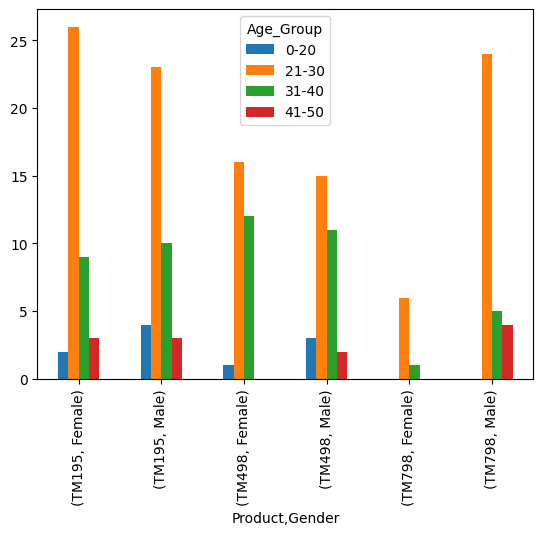

In [11]:
# Analyze the distribution of products across gender and age levels
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50], labels=['0-20', '21-30', '31-40', '41-50'])

# Group the data by Product and Age Group
pga_distribution = df.groupby(['Product', 'Gender', 'Age_Group']).size().unstack()
pga_distribution.plot(kind='bar')

<h4>2.2 Product Income Based Analysis</h4>

<Axes: ylabel='Frequency'>

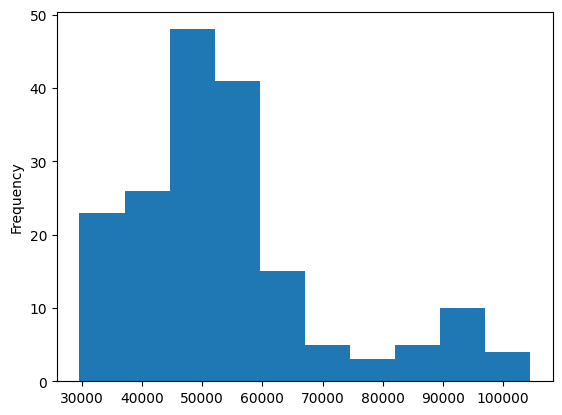

In [12]:
# Analyze income distribution among customers
df['Income'].plot(kind ='hist')

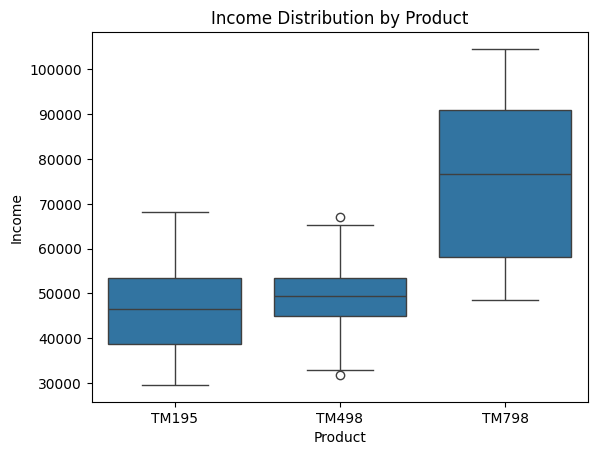

In [13]:
# Analyze income distribution among customers for each specific product
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Income Distribution by Product')
plt.show()

# product_income_data = df.groupby('Product')['Income'].agg(['mean', 'std']).reset_index()
# plt.figure(figsize=(10, 6))
# plt.bar(product_income_data['Product'], product_income_data['mean'], yerr=product_income_data['std'], capsize=10)
# plt.xlabel('Product')
# plt.ylabel('Income')
# plt.title('Product Performance with Standard Deviation')
# plt.show()

<h4>2.3 Product Usage Based Analysis</h4>

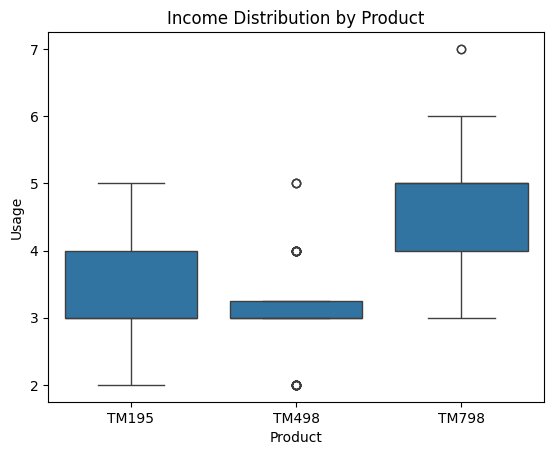

In [14]:
# Analyze Usage distribution among customers for each specific product
sns.boxplot(x='Product', y='Usage', data=df)
plt.title('Income Distribution by Product')
plt.show()

<Axes: xlabel='Usage'>

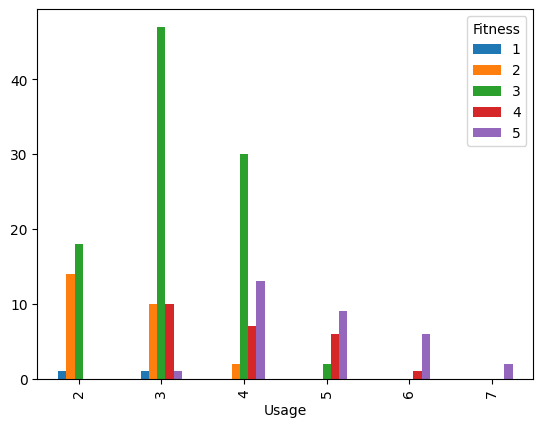

In [15]:
# Analyze the correalation between usage and fitness levels
uf_distribution = df.groupby(['Usage', 'Fitness']).size().unstack()
uf_distribution.plot(kind='bar')

<Axes: xlabel='Product'>

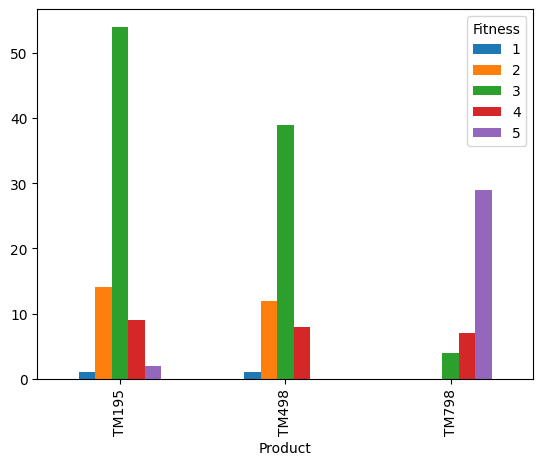

In [16]:
# Analyze the correalation between usage and fitness levels
pf_distribution = df.groupby(['Product', 'Fitness']).size().unstack()
pf_distribution.plot(kind='bar')

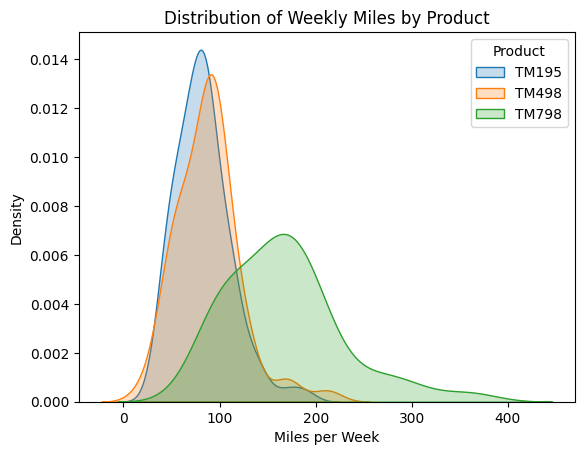

In [17]:
# KDE plot for fitness goals by product
for product in df['Product'].unique():
    subset = df[df['Product'] == product]
    sns.kdeplot(subset['Miles'], fill=True, label=product)

plt.title("Distribution of Weekly Miles by Product")
plt.xlabel("Miles per Week")
plt.ylabel("Density")
plt.legend(title="Product")
plt.show()

<h3>2.4 Product Age Education Based Analysis</h3>

<Axes: ylabel='Frequency'>

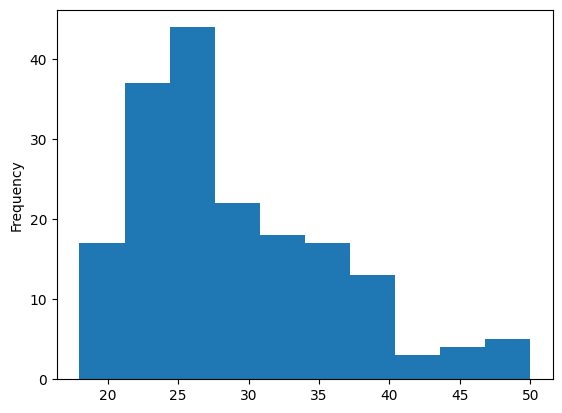

In [23]:
# Analyze age distribution among customers
df['Age'].plot(kind ='hist')

C:\Users\JTOSH\AppData\Local\Temp\ipykernel_3472\255658427.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_avg = df.groupby(['Product', 'Age_Group'])['Education'].mean().reset_index()


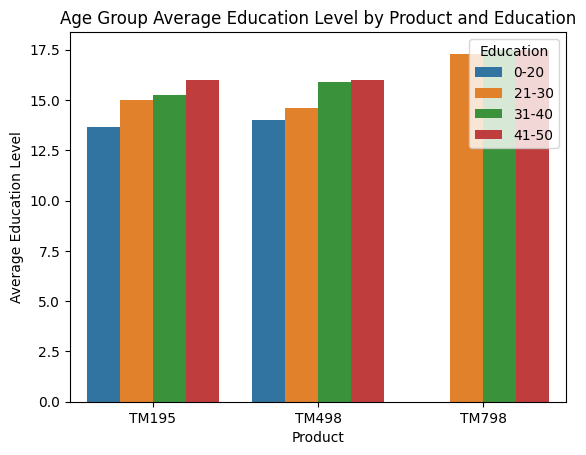

In [32]:
# Analyze the distribution of products across age and education levels

age_avg = df.groupby(['Product', 'Age_Group'])['Education'].mean().reset_index()

sns.barplot(x='Product', y='Education', hue='Age_Group', data=age_avg)
plt.title("Age Group Average Education Level by Product and Education")
plt.xlabel("Product")
plt.ylabel("Average Education Level")
plt.legend(title="Education")
plt.show()

<h2>3. Summary</h2>

A comprehensive analysis examined each customer's attributes, including age, gender, education, marital status, usage patterns, fitness levels, income, and mileage. Our goal is to provide actionable insights that empower AdRight’s market research team to develop highly targeted and effective marketing strategies, tailored to engage each unique customer segment. Below is a snapshot of the typical customer characteristics for each treadmill model:**

**<h4>Customers:</h4>**
* **Gender:** A slight majority of customers were men, representing 57.8% compared to women at 42.2%.
* **Age:** Customers range from 18 to 50 years old. The 21-30 age group is the largest consumer group, while the 41-50 age group is the smallest.
* **Marital Status:** Partnered women make up the largest group of buyers, while single women are the smallest group.
* **Income:** The lowest income among customers is $30,000, and the highest is $100,000. The majority of earners fall between $50,000 and $60,000, with the smallest group earning between $70,000 and $80,000.

**Further breakdown based on product:**

**<h5>3.1 TM195 Customers:</h5>**

1. **Gender:** TM195 has a balanced mix of male and female customers. Partnered women are the largest customer group, while single women are the smallest. The average fitness level is around 3 for both men and women. The largest age group for women using this product is 21-30, while the smallest is under 20. For men, the largest age group is 20-31, with the 41-50 group being the smallest. Men have a slightly higher usage rate than women.
2. **Age:** The 21-30 age group is the largest among TM195 users, with the under-20 and 41-50 groups being the smallest.
3. **Income:** Most buyers of this product fall within the $40,000-$50,000 earning range.
4. **Fitness:** Most customers report a fitness level of 3.
5. **Miles:** The average distance covered is approximately 90 miles per week.

**<h5>3.2 TM498 Customers:</h5>**

1. **Gender:** TM498 has a has slight more male than female customer. Partnered men are the largest customer group, while single men are the smallest. The average fitness level is around 3 for both men and women. The largest age group for women using this product is 21-30, while the smallest is under 20. For men, the largest age group is 20-31, with the 41-50 group being the smallest. Men have a slightly lower usage rate than women.
2. **Age:** The 21-30 age group is the largest among TM498 users, with the under-20 being the smallest.
3. **Income:** Most buyers of this product fall within the range as TM195 but with a higher 2nd percentile.
4. **Fitness:** Most customers report a fitness level of about 3 same as TM195.
5. **Miles:** The average distance covered is approximately 90 miles per week.

**<h5>3.3 TM798 Customers:</h5>**

1. **Gender:** TM798 has about seven times more men than women using it. Partnered men are the largest customer group, while single women are the smallest. The average fitness level is around 5 for both men and women. The largest age group for women using this product is 21-30, while the smallest is 41 - 50. For men, the largest age group is 20-31, with the 41-50 group being the smallest. Men have three times the usage rate than women.
2. **Age:** The 21-30 age group is the largest among TM798 users, with the under-20 and 41-50 groups being the smallest.
3. **Income:** Most buyers of this product fall within the 60,000 - 90,000 earning range.
4. **Fitness:** Most customers report a fitness level of 4.8.
5. **Miles:** The average distance covered is approximately 180 miles per week.




